Importing data

In [1]:
import pandas as pd
import numpy as np

data = ".\\DATA\\train.csv"
test = ".\\DATA\\test.csv"

data = pd.read_csv(data)
test = pd.read_csv(test)

data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [3]:
data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Changing  Column name for Convenience

In [4]:
data.rename(columns = {'Air temperature [K]': "Air temperature"}, inplace = True)
data.rename(columns = {'Process temperature [K]': 'Process temperature'}, inplace = True)
data.rename(columns = {'Rotational speed [rpm]': 'Rotational speed'}, inplace = True)
data.rename(columns = {'Torque [Nm]': 'Torque'}, inplace = True)
data.rename(columns = {'Tool wear [min]': 'Tool wear'}, inplace = True)


test.rename(columns = {'Air temperature [K]': "Air temperature"}, inplace = True)
test.rename(columns = {'Process temperature [K]': 'Process temperature'}, inplace = True)
test.rename(columns = {'Rotational speed [rpm]': 'Rotational speed'}, inplace = True)
test.rename(columns = {'Torque [Nm]': 'Torque'}, inplace = True)
test.rename(columns = {'Tool wear [min]': 'Tool wear'}, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


Data has no null value...

Additionally  the data consists 2 columns have object Dtype..

So, using mannual Encoding to eleminate respective object Dtype..

In [6]:
print(data["Type"].value_counts())

L    95354
M    32152
H     8923
Name: Type, dtype: int64


# Preprocessing

As "Type" column has only 3 values....
OnHotEncoding is preferable...


Mannual OneHotEncoding

In [7]:
# data optimization

#  removing characters from type by adding new axes..

data = pd.concat([data, pd.get_dummies(data["Type"], prefix= "Type").astype(int)] , axis = 1)
data.drop("Type", axis = 1, inplace = True)

test = pd.concat([test, pd.get_dummies(test["Type"], prefix= "Type").astype(int)] , axis = 1)
test.drop("Type", axis = 1, inplace = True)

data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,L50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


Since first letter of Product Id is the type of vehicle, and type is already taken care of...

So removing the index '0'  from the "Product Id" column and converting the remaining part into integer...

In [8]:
# data optimization

# Removing type prefix from product id

data["Product ID"] = [int(i[1:]) for i  in data["Product ID"]]
test["Product ID"] = [int(i[1:]) for  i in test["Product ID"]]

data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  int64  
 2   Air temperature      136429 non-null  float64
 3   Process temperature  136429 non-null  float64
 4   Rotational speed     136429 non-null  int64  
 5   Torque               136429 non-null  float64
 6   Tool wear            136429 non-null  int64  
 7   Machine failure      136429 non-null  int64  
 8   TWF                  136429 non-null  int64  
 9   HDF                  136429 non-null  int64  
 10  PWF                  136429 non-null  int64  
 11  OSF                  136429 non-null  int64  
 12  RNF                  136429 non-null  int64  
 13  Type_H               136429 non-null  int32  
 14  Type_L               136429 non-null  int32  
 15  Type_M           

Now all the columns are either integer or Float point.

Going ahead for Data visualization.

53257    139
49056    131
53271    131
54275    120
48892    120
        ... 
24614      1
39399      1
15853      1
32637      1
48036      1
Name: Product ID, Length: 9976, dtype: int64


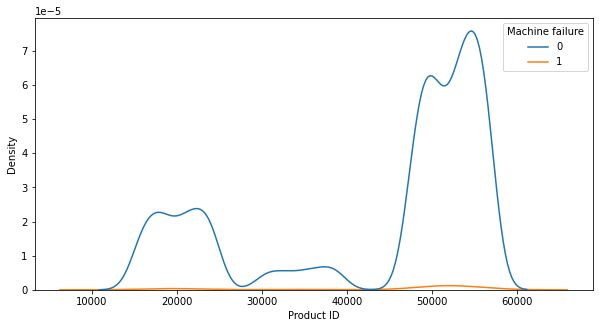

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data["Product ID"].value_counts())

plt.rcParams['figure.figsize'] = (10,5)
sns.kdeplot(data = data, x = "Product ID", hue = "Machine failure")
plt.show()

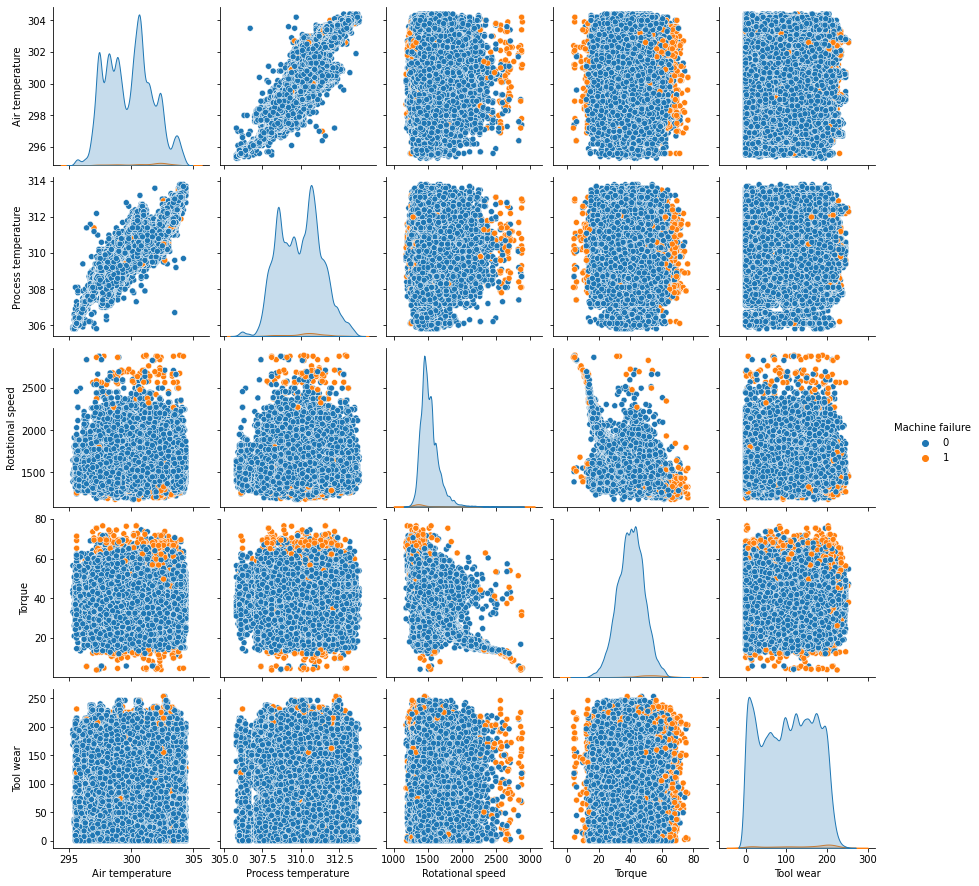

In [11]:
sns.pairplot(data = data.iloc[:, 2:8], hue = "Machine failure")

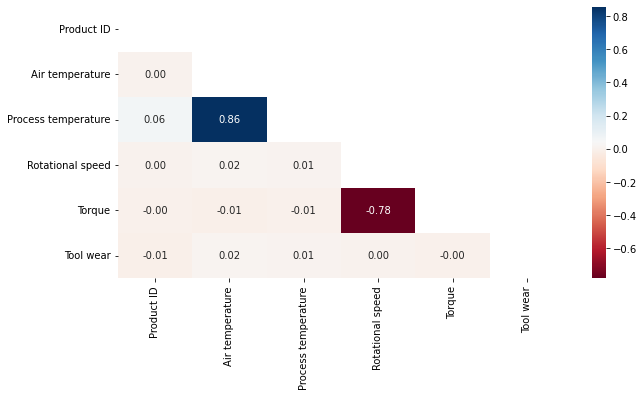

In [12]:
corr = data.iloc[:, 1:7].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.show()

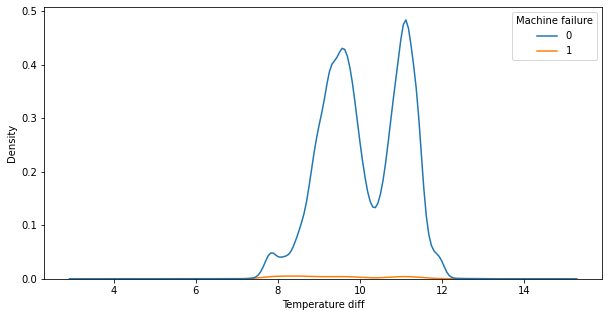

In [13]:
# data optimization

# data["Temperature ratio"] = data["Process temperature"] / data["Air temperature"]
# test["Temperature ratio"] = test["Process temperature"] / test["Air temperature"]

data["Temperature diff"] = data["Process temperature"] - data["Air temperature"]
test["Temperature diff"] = test["Process temperature"] - test["Air temperature"]

# sns.kdeplot(data = data, x = "Temperature ratio", hue = "Machine failure")
# plt.show()
sns.kdeplot(data = data, x = "Temperature diff", hue = "Machine failure")
plt.show()

In [14]:
# data optimization

data["dummy"] = [2 * np.pi * i / 60 for i in data["Rotational speed"] ]
data["Power"] = data["Torque"] * data["dummy"]

test["dummy"] = [2 * np.pi * i / 60 for i in test["Rotational speed"] ]
test["Power"] = test["Torque"] * test["dummy"]

data.drop("dummy", axis = 1, inplace = True)
data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Temperature diff,Power
0,0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0,9.0,6033.491523
1,1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1,9.5,5360.279633
2,2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0,9.2,5009.007687
3,3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0,9.9,7069.965771
4,4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1,11.0,6083.317183


Preprocesssing

Standardizing the columns :- Air temperature, Process temperature, Rotational speed, Torque, Tool wear

In [15]:

for col in ["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear"]:
    min_val, sd = data[col].min(), data[col].std()
    data[col] = (data[col] - min_val) / sd


data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Temperature diff,Power
0,0,50096,2.846024,2.743339,2.991279,3.799004,2.188696,0,0,0,0,0,0,0,1,0,9.0,6033.491523
1,1,20343,3.919995,4.548168,4.166167,2.975690,3.126708,0,0,0,0,0,0,0,0,1,9.5,5360.279633
2,2,49454,2.147943,1.949215,4.497731,2.669888,0.390838,0,0,0,0,0,0,0,1,0,9.2,5009.007687
3,3,53355,3.060818,3.681850,2.472310,4.763457,3.079807,0,0,0,0,0,0,0,1,0,9.9,7069.965771
4,4,24050,1.449861,2.310181,3.315635,3.716672,0.531540,0,0,0,0,0,0,0,0,1,11.0,6083.317183


In [16]:
from sklearn.metrics import confusion_matrix

# using confusion matrix to find correlation

print("Type H: \n", confusion_matrix(data["Type_H"], data["Machine failure"]), "\n")
print("Type M: \n", confusion_matrix(data["Type_M"], data["Machine failure"]), "\n")
print("Type L: \n", confusion_matrix(data["Type_L"], data["Machine failure"]))

Type H: 
 [[125474   2032]
 [  8807    116]] 

Type M: 
 [[102566   1711]
 [ 31715    437]] 

Type L: 
 [[40522   553]
 [93759  1595]]


In [17]:
#  local failures

print("TWF: \n", confusion_matrix(data["TWF"], data["Machine failure"]), "\n")
print("HDF: \n", confusion_matrix(data["HDF"], data["Machine failure"]), "\n")
print("PWF: \n", confusion_matrix(data["PWF"], data["Machine failure"]), "\n")
print("OSF: \n", confusion_matrix(data["OSF"], data["Machine failure"]), "\n")
print("RNF: \n", confusion_matrix(data["RNF"], data["Machine failure"]))


TWF: 
 [[134281   1936]
 [     0    212]] 

HDF: 
 [[134275   1450]
 [     6    698]] 

PWF: 
 [[134278   1824]
 [     3    324]] 

OSF: 
 [[134277   1612]
 [     4    536]] 

RNF: 
 [[133979   2142]
 [   302      6]]


In [18]:
# data optimization

#   LF = atleast one failure among 'TWF', 'HDF', 'PWF', 'OSF' and 'RNF'

data["LF"] =  data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].gt(0).sum(axis = 1)
data["LF"] = [0 if (i == 0) else 1 for i in data["LF"]]

test["LF"] =  test[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].gt(0).sum(axis = 1)
test["LF"] = [0 if (i == 0) else 1 for i in test["LF"]]
 
print(confusion_matrix(data["LF"], data["Machine failure"]))

[[133966    507]
 [   315   1641]]


Applying tool wear theory

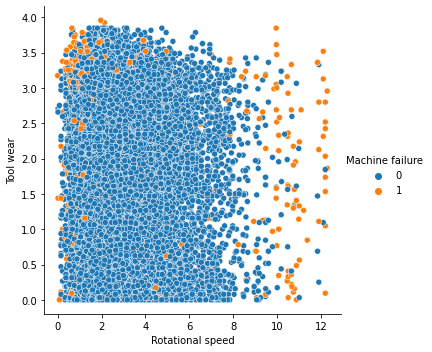

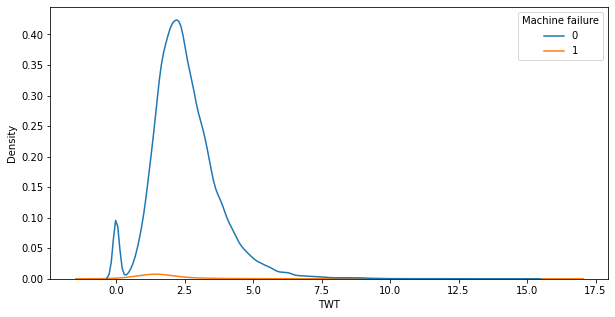

In [19]:
# data optimization

#   finding constant of tool wear theory 
#  V * T ^n = constant   ... n ranges in between 0 to 1

sns.relplot(data = data, x = "Rotational speed", y = "Tool wear", hue = "Machine failure")
plt.show()

# data["dummy2"] = data["dummy"] * data["Tool wear [min]"]
# sns.kdeplot(data = data, x = "dummy2", hue = "Machine failure")
# plt.show()

data["TWT"] = data["Rotational speed"] * data["Tool wear"] ** 0.2
test["TWT"] = test["Rotational speed"] * test["Tool wear"] ** 0.2


sns.kdeplot(data = data, x = "TWT", hue = "Machine failure")
plt.show()

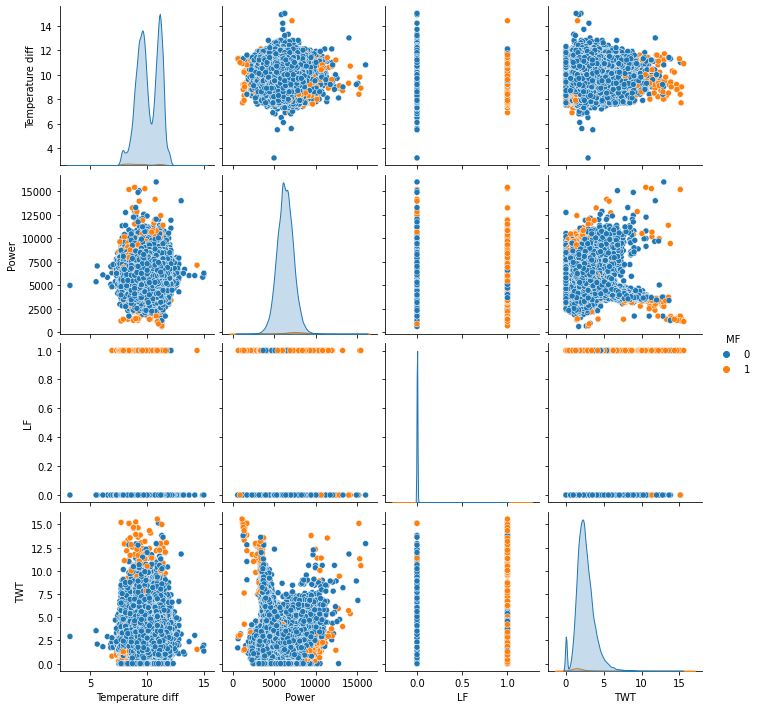

In [20]:
# Data visualization

data["MF"] = data["Machine failure"]
sns.pairplot(data = data.iloc[:, 16:], hue = "MF")
plt.show()

In [21]:
data.head()

,id,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,...,OSF,RNF,Type_H,Type_L,Type_M,Temperature diff,Power,LF,TWT,MF
0,0,50096,2.846024,2.743339,2.991279,3.799004,2.188696,0,0,0,...,0,0,0,1,0,9.0,6033.491523,0,3.498598,0
1,1,20343,3.919995,4.548168,4.166167,2.975690,3.126708,0,0,0,...,0,0,0,0,1,9.5,5360.279633,0,5.233041,0
2,2,49454,2.147943,1.949215,4.497731,2.669888,0.390838,0,0,0,...,0,0,0,1,0,9.2,5009.007687,0,3.727288,0
3,3,53355,3.060818,3.681850,2.472310,4.763457,3.079807,0,0,0,...,0,0,0,1,0,9.9,7069.965771,0,3.096048,0
4,4,24050,1.449861,2.310181,3.315635,3.716672,0.531540,0,0,0,...,0,0,0,0,1,11.0,6083.317183,0,2.921958,0


In [22]:
print(data.columns, "\n\n")

data.info()

Index(['id', 'Product ID', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M',
       'Temperature diff', 'Power', 'LF', 'TWT', 'MF'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  int64  
 2   Air temperature      136429 non-null  float64
 3   Process temperature  136429 non-null  float64
 4   Rotational speed     136429 non-null  float64
 5   Torque               136429 non-null  float64
 6   Tool wear            136429 non-null  float64
 7   Machine failure      136429 non-null  int64  
 8   TWF                  136429 non-null  int64  
 9   HDF                  136429 non-

data.info()

In [23]:
test_features = ['Product ID', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'TWF',
                'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M', 'Temperature diff', 'Power', 'LF', 'TWT']

x = data[test_features]

y = data["Machine failure"]

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 5)
x_train.head()

,Product ID,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Temperature diff,Power,LF,TWT
44163,24143,1.503560,2.237987,3.121021,4.681125,2.829671,0,0,0,0,0,0,0,1,10.8,7369.171056,0,3.842766
21875,47294,1.879450,2.021408,2.911992,3.504963,1.485186,0,0,0,0,0,0,1,0,9.8,5576.955279,0,3.151711
22374,54170,2.899723,3.826237,3.063358,3.363824,1.063081,0,0,0,0,0,0,1,0,10.4,5449.029626,0,3.101066
101018,18710,3.758900,3.826237,2.587637,4.610556,2.845304,0,0,0,0,0,0,0,1,8.8,6934.542184,0,3.189547
78606,53728,3.329311,3.537464,1.953341,4.810503,1.813491,0,0,0,0,0,0,1,0,9.2,6796.772874,0,2.200296


In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score


clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


[[6728    3]
 [  19   72]]
0.9967751392553503 0.8953815461020928


In [26]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict
# from numba import njit

# @njit
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 10, 18),
        'learning_rate': trial.suggest_float('learning_rate', 0.000001, 0.1, log=True),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.3),
        # 'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        # 'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0001, 1.0),
        'gamma': trial.suggest_float('gamma', 0.00001, 0.1),
        # 'booster': 'gbtree',
        'objective': 'binary:logistic',
        # 'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        # 'tree_method': 'gpu_hist',
    }

    model = xgb.XGBClassifier(**params, n_jobs = -1)


    cv = StratifiedKFold(n_splits=5)
    y_pred_proba = cross_val_predict(model, x_train, y_train, cv=cv, method='predict_proba')[:,1]
    auc = roc_auc_score(y_train, y_pred_proba)
    
    return auc


study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials= 50)

best_XGB = study.best_params
print("Best: ", best_XGB)

[I 2023-09-30 20:35:49,959] A new study created in memory with name: no-name-40babc30-aa7c-40b8-b231-1fae616ea8e9
[I 2023-09-30 20:36:08,519] Trial 0 finished with value: 0.936975397563025 and parameters: {'max_depth': 10, 'learning_rate': 0.0036145283250939536, 'reg_alpha': 0.4671635199616869, 'reg_lambda': 0.7688974698772257, 'gamma': 0.05848662885892118}. Best is trial 0 with value: 0.936975397563025.
[I 2023-09-30 20:36:32,050] Trial 1 finished with value: 0.9382202847997115 and parameters: {'max_depth': 12, 'learning_rate': 1.6795689819215097e-05, 'reg_alpha': 0.06130878326055563, 'reg_lambda': 0.3504466138734588, 'gamma': 0.08593724693889554}. Best is trial 1 with value: 0.9382202847997115.
[I 2023-09-30 20:36:51,392] Trial 2 finished with value: 0.9250224539472545 and parameters: {'max_depth': 18, 'learning_rate': 1.5268257729061376e-05, 'reg_alpha': 0.40323643401200426, 'reg_lambda': 0.8396731027959023, 'gamma': 0.006004673754313503}. Best is trial 1 with value: 0.9382202847997

Best:  {'max_depth': 12, 'learning_rate': 0.054622028657463954, 'reg_alpha': 0.4572368111720003, 'reg_lambda': 0.775729662582969, 'gamma': 0.09496934500606441}


In [27]:
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, **best_XGB)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

[[6727    4]
 [  18   73]]
0.9967751392553503 0.9008017684291642


In [28]:
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, **best_XGB)
clf.fit(x, y)
y_pred = clf.predict(test[test_features])

answer = pd.DataFrame(test.id)

answer['Machine failure'] = y_pred
print(answer.info())

answer.to_csv(".\\DATA\\solution.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               90954 non-null  int64
 1   Machine failure  90954 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.0 MB
None
